In [1]:
! echo `whoami` @ `hostname`

mt @ tomopy-bnl-gov


In [2]:
cd ~/xpdAcqAn/data/reza/Ni2v-480

/home/mt/xpdAcqAn/data/reza/Ni2v-480


In [5]:
# here is the data (7.2 GiB)
! ls

dark_sub  fq  iq  itth	mask  meta  pdf  sq


In [6]:
# these are done on my laptop
# conda install -c conda-forge xpdacq
# conda install -c conda-forge xpdan
# conda install -c conda-forge xpdtools

In [7]:
# CJ, can you see this ?
# yes

In [8]:
# Most people use the command line interface after producing .poni files from pyFAI
# on the command line 

In [9]:
# Hi CJ

In [10]:
# excuse me if this is a sily question
# where is .poni files ?

In [11]:
# you need to make them from the calibration data set via pyFAI-calib 
# (we've started saving them out in the newest release I think)
# pyFAI docs: https://pyfai.readthedocs.io/en/latest/man/pyFAI-calib.html

# Then you can run image_to_iq from xpdtools https://xpdacq.github.io/xpdtools/

In [12]:
# how can get some .poni files for learning purpose ?

In [13]:
# Give me a sec I can send you one (although it won't be correct for your data 
# most likely)
# Do you know your wavelength?
# I can find it 
# 0.188500


[[ 0.  0.  0. ...  0.  0.  0.]
 [-1.  4.  1. ...  2.  4. -3.]
 [-2. -2.  6. ...  2.  1.  3.]
 ...
 [ 1.  0. -2. ...  3. -1.  3.]
 [-2. -1.  1. ...  1.  2. -4.]
 [ 0.  0.  0. ...  0.  0.  0.]]


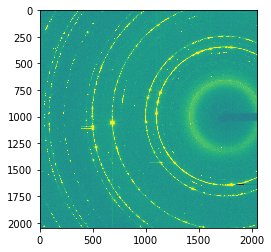

In [17]:
# /home/mt/xpdAcqAn/data/reza/Ni2v-480/dark_sub/Ni2v-480_20180717-072427_8a037d_0001.tiff
# in my case, Ni2v-480_20180717-072427_8a037d_0001.tiff, rigt ?
# yes
# although filesize is 16 Mb
# this tiff is just white. 
# that is odd, how are you opening it?
# I have tried okular, gimp, and some others
import tifffile
import numpy as np

f = '/home/mt/xpdAcqAn/data/reza/Ni2v-480/dark_sub/Ni2v-480_20180717-072427_8a037d_0001.tiff'
img = tifffile.imread(f)
print(img)
# let me do it
# Ok, that looks about right if you want a better view
import matplotlib.pyplot as plt
% matplotlib inline
plt.imshow(img, vmax=100)
# please try it again
# how does that look?
# It is a bit spotty to my eye
# I am new to this filed
# Is that your calibration data set?
# I think this is for real sample that Reza brought to measure
# Ah ok do you know where your calibration data is?

# Randy copied data to his harddrive
# I only see folders for Reza's samples. I don't see anything like calib***

# most likely it is called Ni
# can you list the folders you have?

In [23]:
import yaml
# sorry this is missing a few things
# I think this is ready to run
with open('/home/mt/xpdAcqAn/data/reza/Ni2v-480/meta/Ni2v-480_8a037d.yaml', 'r') as f:
  meta = yaml.load(f)
print(meta['calibration_md'])
# that is the calibration data that we need (usualslly it is held in a .poni file, 
# but this is a good backup)
# /tmp/tmpy7o32dcs/from_calib_func.poni is this .poni we are looking for ?
# No that is just a temp file that we have to make to save the calibration
# give me a few I need to make a function to turn this into a .poni file
# ok. thanks

# no problem, it is functionality we need


{'directDist': 1419.8553079885053, 'dSpacing': [3.12441816, 2.7058255, 1.91330756, 1.63167417, 1.56220908, 1.35291275, 1.24151789, 1.21008195, 1.10464863, 1.04147272, 0.95665378, 0.91473597, 0.90194183, 0.85565715, 0.82526904, 0.81583708, 0.78110454, 0.75778271, 0.75046097, 0.72316228, 0.70453695, 0.67645637, 0.6611384, 0.65625908, 0.63776919, 0.62488363, 0.62075894, 0.60504098, 0.59400587, 0.59045953, 0.57688393, 0.56729517, 0.55232432, 0.54389139, 0.5411651, 0.53065604, 0.52316405, 0.52073636, 0.50463906, 0.50245918, 0.50030731], 'tiltPlanRotation': 170.12458476399203, 'centerY': 996.5629338472975, 'splineFile': None, 'pixel2': 0.0002, 'wavelength': 1.885e-11, 'poni2': 0.3623294837680643, 'rot2': 0.0017669390135718567, 'time': '20180716-125227', 'rot1': 0.01015000085997972, 'pixelY': 200.0, 'detector': 'Perkin detector', 'poni_file_name': '/tmp/tmpy7o32dcs/from_calib_func.poni', 'pixel1': 0.0002, 'poni1': 0.19680379033758916, 'dist': 1.4197799537507336, 'centerX': 1739.5911055913032,

In [26]:
from pyFAI.azimuthalIntegrator import AzimuthalIntegrator
ai = AzimuthalIntegrator()
ai.setPyFAI(**meta['calibration_md'])
# I think this will save a poni file
ai.save('./meta/Ni2v-480_8a037d.poni')
# need another one (I thought that pyFAI was smart enough to do the ext)

# great that is the poni file and it looks correct


In [25]:
ls

dark_sub/  fq/  iq/  itth/  mask/  meta/  Ni2v-480_8a037d.poni  pdf/  sq/


In [27]:
! cat /home/mt/xpdAcqAn/data/reza/Ni2v-480/meta/Ni2v-480_8a037d.poni

# Nota: C-Order, 1 refers to the Y axis, 2 to the X axis 
# Calibration done at Fri Aug 17 10:05:31 2018
Detector: Perkin
PixelSize1: 0.0002
PixelSize2: 0.0002
Distance: 1.4197799537507336
Poni1: 0.19680379033758916
Poni2: 0.3623294837680643
Rot1: 0.01015000085997972
Rot2: 0.0017669390135718567
Rot3: 1.0701327607816483e-06
Wavelength: 1.885e-11


In [29]:
from xpdtools.cli.process_tiff import main
# so this is the main way to process the data in python (it matches up with the
# xpdtools CLI)
# I see

# you can also inspect the docs associated with the function via
# main?
main(poni_file='/home/mt/xpdAcqAn/data/reza/Ni2v-480/meta/Ni2v-480_8a037d.poni',
     image_files='/home/mt/xpdAcqAn/data/reza/Ni2v-480/dark_sub/Ni2v-480_20180717-072427_8a037d_0001.tiff',
     alpha=2.5)


main(poni_file='/home/mt/xpdAcqAn/data/reza/Ni2v-480/meta/Ni2v-480_8a037d.poni',
     image_files='/home/mt/xpdAcqAn/data/reza/Ni2v-480/dark_sub/Ni2v-480_20180717-072427_8a037d_0020.tiff',
     alpha=2.5)


main(poni_file='/home/mt/xpdAcqAn/data/reza/Ni2v-480/meta/Ni2v-480_8a037d.poni',
     image_files='/home/mt/xpdAcqAn/data/reza/Ni2v-480/dark_sub/Ni2v-480_20180717-072427_8a037d_0200.tiff',
     alpha=2.5)


main(poni_file='/home/mt/xpdAcqAn/data/reza/Ni2v-480/meta/Ni2v-480_8a037d.poni',
     image_files='/home/mt/xpdAcqAn/data/reza/Ni2v-480/dark_sub/Ni2v-480_20180717-072427_8a037d_0270.tiff',
     alpha=2.5)

/home/mt/software/miniconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


{'alpha': 2.5, 'tmsk': None, 'edge': 20, 'lower_thresh': 1.0, 'auto_type': 'median', 'upper_thresh': None}


/home/mt/software/miniconda3/lib/python3.5/site-packages/skbeam/core/accumulators/binned_statistic.py:346: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.result = self.result[core]


start auto mask


100%|██████████| 2841/2841 [00:01<00:00, 3777.93it/s]


finished auto mask


/home/mt/software/miniconda3/lib/python3.5/site-packages/skbeam/core/accumulators/binned_statistic.py:346: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.result = self.result[core]
/home/mt/software/miniconda3/lib/python3.5/site-packages/skbeam/core/accumulators/binned_statistic.py:346: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.result = self.result[core]


{'alpha': 2.5, 'tmsk': None, 'edge': 20, 'lower_thresh': 1.0, 'auto_type': 'median', 'upper_thresh': None}


/home/mt/software/miniconda3/lib/python3.5/site-packages/skbeam/core/accumulators/binned_statistic.py:346: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.result = self.result[core]


start auto mask


100%|██████████| 2841/2841 [00:00<00:00, 8341.66it/s] 


finished auto mask


/home/mt/software/miniconda3/lib/python3.5/site-packages/skbeam/core/accumulators/binned_statistic.py:346: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.result = self.result[core]


{'alpha': 2.5, 'tmsk': None, 'edge': 20, 'lower_thresh': 1.0, 'auto_type': 'median', 'upper_thresh': None}


/home/mt/software/miniconda3/lib/python3.5/site-packages/skbeam/core/accumulators/binned_statistic.py:346: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.result = self.result[core]


start auto mask


100%|██████████| 2841/2841 [00:00<00:00, 5538.93it/s] 


finished auto mask


/home/mt/software/miniconda3/lib/python3.5/site-packages/skbeam/core/accumulators/binned_statistic.py:346: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.result = self.result[core]


{'alpha': 2.5, 'tmsk': None, 'edge': 20, 'lower_thresh': 1.0, 'auto_type': 'median', 'upper_thresh': None}


/home/mt/software/miniconda3/lib/python3.5/site-packages/skbeam/core/accumulators/binned_statistic.py:346: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.result = self.result[core]


start auto mask


100%|██████████| 2840/2840 [00:00<00:00, 6252.59it/s] 


finished auto mask


/home/mt/software/miniconda3/lib/python3.5/site-packages/skbeam/core/accumulators/binned_statistic.py:346: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.result = self.result[core]


((array([2.75053991e-03, 4.97263630e-03, 8.24613720e-03, ...,
         9.21206124e+00, 9.21499803e+00, 9.22707974e+00]),),
 (array([0.        , 4.        , 1.66666671, ..., 0.        , 0.        ,
         0.        ]),),
 (array([0., 3., 2., ..., 0., 0., 0.]),),
 (array([0.        , 1.78885438, 0.47140455, ..., 0.        , 0.        ,
         0.        ]),))

In [30]:
# /home/mt/xpdAcqAn/data/reza/Ni2v-480/dark_sub/Ni2v-480_20180717-072427_8a037d_0001_median.chi
# generated and it looks good
# Great!
# you can modify the various parameters on main to change how the data is processed
# what is the mask used here ?

# The mask is auto generated (you should see .msk and .npy files) this is used
# to remove bad pixels

# is this mask same as the one here /home/mt/xpdAcqAn/data/reza/Ni2v-480/mask ?

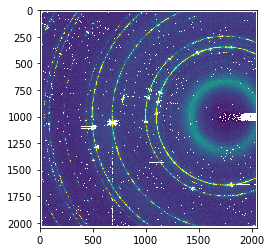

In [32]:
# this will show the mask on the image
from xpdtools.tools import overlay_mask
mask = np.load('/home/mt/xpdAcqAn/data/reza/Ni2v-480/dark_sub/Ni2v-480_20180717-072427_8a037d_0001_mask.npy')
overlay = overlay_mask(img, mask)
plt.imshow(overlay, vmax=100)

In [33]:
pwd

'/home/mt/xpdAcqAn/data/reza/Ni2v-480'

In [34]:
# can you list the dir?
# ls

In [35]:
# that looks correct, if you change the masking parameters you can see how the mask changes
# Ok. Let me try to digest these
# Just a quick question
# What is the difference 
# of the mask we just created and
# one already in /home/mt/xpdAcqAn/data/reza/Ni2v-480/mask ?

# most likely they are very similar since they were created with the same 
# algorithm

# the big two differences are
# 1. You most likely have the bug fixes that went out to XPD the other day
# (If not you can update xpdtools via `conda update xpdtools -c conda-forge`)
# 2. I tightened the alpha to 2.5 (from 3.0) which would cause more pixels to be
# removed

# In the screenshot I sent you
# we have itth 

# Do they use same mask generated at time=0 or
# generate new mask at each time step ?

# That depends on how the pipeline was set at the time and during the data
# processing here. If you provide a list of images to main then they will all
# get their own masks, due to how `auto_setting` is set.

# I see

# In the plot above, how can I see mask ?

# All the white pixels are masked out

# here are the docs for main https://xpdacq.github.io/xpdtools/xpdtools.cli.html#xpdtools.cli.process_tiff.main

# Ok. I will look
# I just wanted to se sth like this: https://www.google.com/search?biw=1003&bih=1032&tbm=isch&sa=1&ei=xj5rW9r5OMzXzwLUnZ6wAw&q=fit2d+masking&oq=fit2d+masking&gs_l=img.3...3517.3517.0.3804.1.1.0.0.0.0.70.70.1.1.0....0...1c.1.64.img..0.0.0....0.07qaPtYWJo0#imgrc=WqBT78akDTPD2M:

# anyway, thank you very much CJ
# This was a great start for me
# I appreciate your time

# sure, you can play around with the matplotlib colormaps to get something similar to that
# there may be a way to change the color associated with np.nan 
# (which is what the masked pixels have the value set to via `overlay_mask`)

# I see

In [36]:
# compare old and new 

# time = 0
o_0000 = np.loadtxt('/home/mt/xpdAcqAn/data/reza/Ni2v-480/iq/Ni2v-480_20180717-072427_8a037d_0001.chi', unpack=True, comments='#', usecols=(0,1), skiprows=8) 
n_0000 = np.loadtxt('/home/mt/xpdAcqAn/data/reza/Ni2v-480/dark_sub/Ni2v-480_20180717-072427_8a037d_0001.chi', unpack=True, comments='#', usecols=(0,1), skiprows=8)


# time = 10
o_0010 = np.loadtxt('/home/mt/xpdAcqAn/data/reza/Ni2v-480/iq/Ni2v-480_20180717-072427_8a037d_0020.chi', unpack=True, comments='#', usecols=(0,1), skiprows=8) 
n_0010 = np.loadtxt('/home/mt/xpdAcqAn/data/reza/Ni2v-480/dark_sub/Ni2v-480_20180717-072427_8a037d_0020.chi', unpack=True, comments='#', usecols=(0,1), skiprows=8)


# time = 100
o_0100 = np.loadtxt('/home/mt/xpdAcqAn/data/reza/Ni2v-480/iq/Ni2v-480_20180717-072427_8a037d_0200.chi', unpack=True, comments='#', usecols=(0,1), skiprows=8) 
n_0100 = np.loadtxt('/home/mt/xpdAcqAn/data/reza/Ni2v-480/dark_sub/Ni2v-480_20180717-072427_8a037d_0200.chi', unpack=True, comments='#', usecols=(0,1), skiprows=8)


# time = 135
o_0135 = np.loadtxt('/home/mt/xpdAcqAn/data/reza/Ni2v-480/iq/Ni2v-480_20180717-072427_8a037d_0270.chi', unpack=True, comments='#', usecols=(0,1), skiprows=8) 
n_0135 = np.loadtxt('/home/mt/xpdAcqAn/data/reza/Ni2v-480/dark_sub/Ni2v-480_20180717-072427_8a037d_0270.chi', unpack=True, comments='#', usecols=(0,1), skiprows=8)


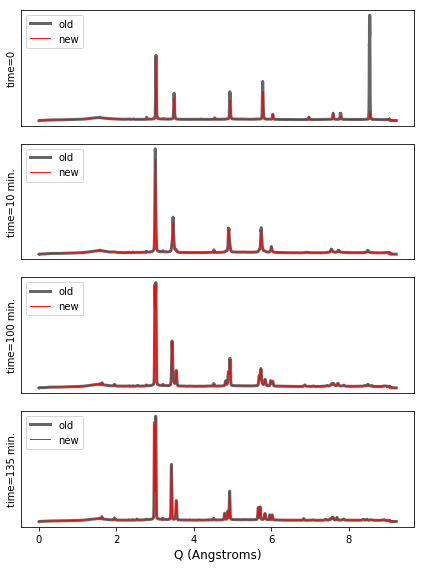

In [37]:
fig = plt.figure(figsize=(6,8))

ax = fig.add_subplot('411')
ax.plot(o_0000[0],o_0000[1],'k-',lw=3,alpha=0.6,label='old')
ax.plot(n_0000[0],n_0000[1],'r-',lw=1,alpha=0.9,label='new')
ax.set_yticks([])
ax.set_xticks([])
ax.set_ylabel('time=0')
ax.legend(loc='upper left')

ax = fig.add_subplot('412')
ax.plot(o_0010[0],o_0010[1],'k-',lw=3,alpha=0.6,label='old')
ax.plot(n_0010[0],n_0010[1],'r-',lw=1,alpha=0.9,label='new')
ax.set_yticks([])
ax.set_xticks([])
ax.set_ylabel('time=10 min.')
ax.legend(loc='upper left')

ax = fig.add_subplot('413')
ax.plot(o_0100[0],o_0100[1],'k-',lw=3,alpha=0.6,label='old')
ax.plot(n_0100[0],n_0100[1],'r-',lw=1,alpha=0.9,label='new')
ax.set_yticks([])
ax.set_xticks([])
ax.set_ylabel('time=100 min.')
ax.legend(loc='upper left')

ax = fig.add_subplot('414')
ax.plot(o_0135[0],o_0135[1],'k-',lw=3,alpha=0.6,label='old')
ax.plot(n_0135[0],n_0135[1],'r-',lw=1,alpha=0.9,label='new')
ax.set_yticks([])
ax.set_xlabel('Q (Angstroms)', fontsize=12)
ax.set_ylabel('time=135 min.')
ax.legend(loc='upper left')

plt.tight_layout()
plt.savefig('comp.pdf')

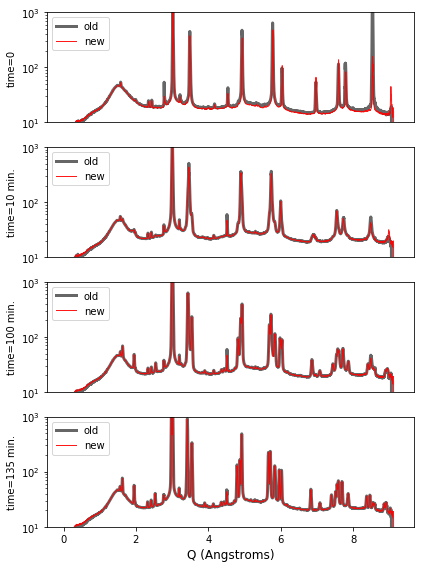

In [38]:
fig = plt.figure(figsize=(6,8))

ax = fig.add_subplot('411')
ax.plot(o_0000[0],o_0000[1],'k-',lw=3,alpha=0.6,label='old')
ax.plot(n_0000[0],n_0000[1],'r-',lw=1,alpha=0.9,label='new')
ax.set_yticks([])
ax.set_xticks([])
ax.set_ylabel('time=0')
ax.legend(loc='upper left')
ax.set_yscale('log')
ax.set_ylim([10,1000])

ax = fig.add_subplot('412')
ax.plot(o_0010[0],o_0010[1],'k-',lw=3,alpha=0.6,label='old')
ax.plot(n_0010[0],n_0010[1],'r-',lw=1,alpha=0.9,label='new')
ax.set_yticks([])
ax.set_xticks([])
ax.set_ylabel('time=10 min.')
ax.legend(loc='upper left')
ax.set_yscale('log')
ax.set_ylim([10,1000])

ax = fig.add_subplot('413')
ax.plot(o_0100[0],o_0100[1],'k-',lw=3,alpha=0.6,label='old')
ax.plot(n_0100[0],n_0100[1],'r-',lw=1,alpha=0.9,label='new')
ax.set_yticks([])
ax.set_xticks([])
ax.set_ylabel('time=100 min.')
ax.legend(loc='upper left')
ax.set_yscale('log')
ax.set_ylim([10,1000])

ax = fig.add_subplot('414')
ax.plot(o_0135[0],o_0135[1],'k-',lw=3,alpha=0.6,label='old')
ax.plot(n_0135[0],n_0135[1],'r-',lw=1,alpha=0.9,label='new')
ax.set_yticks([])
ax.set_xlabel('Q (Angstroms)', fontsize=12)
ax.set_ylabel('time=135 min.')
ax.legend(loc='upper left')
ax.set_yscale('log')
ax.set_ylim([10,1000])

plt.tight_layout()
plt.savefig('comp_logscale.pdf')

In [39]:
# learning from here: https://pyfai.readthedocs.io/en/latest/usage/tutorial/Introduction/introduction.html

In [40]:
import os, time
#Nota: comment out when outside ESRF
# os.environ["http_proxy"] = "http://proxy.esrf.fr:3128"
start_time = time.time()
import pyFAI
print("Using pyFAI version", pyFAI.version)

from silx.resources import ExternalResources
downloader = ExternalResources("pyFAI", "http://www.silx.org/pub/pyFAI/testimages/", "DATA")

moke = downloader.getfile("moke.tif")
print(moke)

#initializes the visualization module to work with the jupyter notebook
%pylab nbagg

Using pyFAI version 0.15.0
/tmp/pyFAI_testdata_mt/moke.tif
Populating the interactive namespace from numpy and matplotlib


/home/mt/software/miniconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<IPython.core.display.Javascript object>


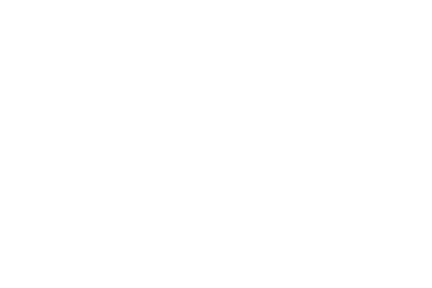

<IPython.core.display.Javascript object>


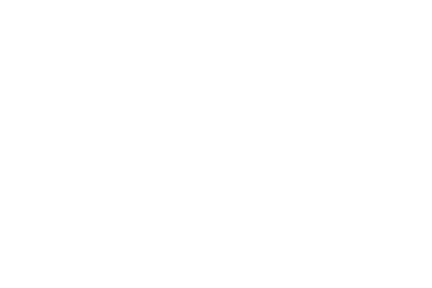

In [42]:
import fabio
from pyFAI.gui import jupyter
img = fabio.open(moke).data
jupyter.display(img, label ="Fake diffraction image")

<IPython.core.display.Javascript object>


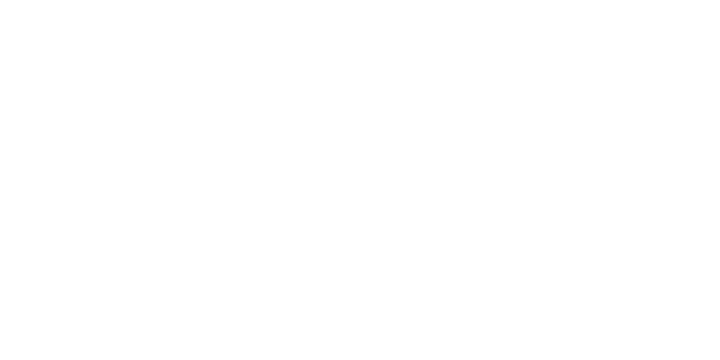

<IPython.core.display.Javascript object>


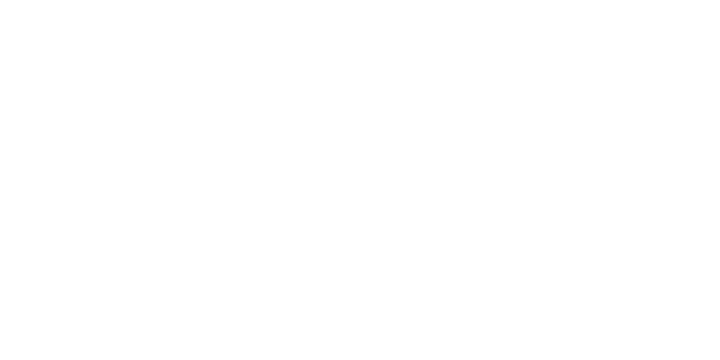

In [43]:
fig, ax = subplots(1,2, figsize=(10,5))
ax[0].imshow(img, origin="lower")
ax[0].set_title("Proper orientation")
ax[1].imshow(img)
ax[1].set_title("Wrong orientation");

In [44]:
import pyFAI
detector = pyFAI.detectors.Detector(pixel1=1e-4, pixel2=1e-4)
ai = pyFAI.AzimuthalIntegrator(dist=0.1, detector=detector)
# Short version ai = pyFAI.AzimuthalIntegrator(dist=0.1, pixel1=1e-4, pixel2=1e-4)
print(ai)

Detector Detector	 Spline= None	 PixelSize= 1.000e-04, 1.000e-04 m
SampleDetDist= 1.000000e-01m	PONI= 0.000000e+00, 0.000000e+00m	rot1=0.000000  rot2= 0.000000  rot3= 0.000000 rad
DirectBeamDist= 100.000mm	Center: x=0.000, y=0.000 pix	Tilt=0.000 deg  tiltPlanRotation= 0.000 deg


In [45]:
help(ai.setFit2D)

Help on method setFit2D in module pyFAI.geometry:

setFit2D(directDist, centerX, centerY, tilt=0.0, tiltPlanRotation=0.0, pixelX=None, pixelY=None, splineFile=None) method of pyFAI.azimuthalIntegrator.AzimuthalIntegrator instance
    Set the Fit2D-like parameter set: For geometry description see
    HPR 1996 (14) pp-240
    
    By reverse engineering we noticed this behavour for Tiff and Mar345 images (at least).
    To obtaine correct result you will have to flip images using numpy.flipud.
    
    :param direct: direct distance from sample to detector along the incident beam (in millimeter as in fit2d)
    :param tilt: tilt in degrees
    :param tiltPlanRotation: Rotation (in degrees) of the tilt plan arround the Z-detector axis
            * 0deg -> Y does not move, +X goes to Z<0
            * 90deg -> X does not move, +Y goes to Z<0
            * 180deg -> Y does not move, +X goes to Z>0
            * 270deg -> X does not move, +Y goes to Z>0
    
    :param pixelX,pixelY: as in 

<IPython.core.display.Javascript object>


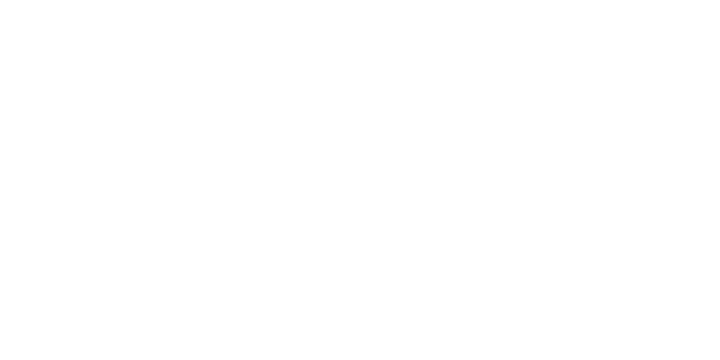

Text(0.5,1,'Display 1d powder diffraction data using pure matplotlib')

<IPython.core.display.Javascript object>


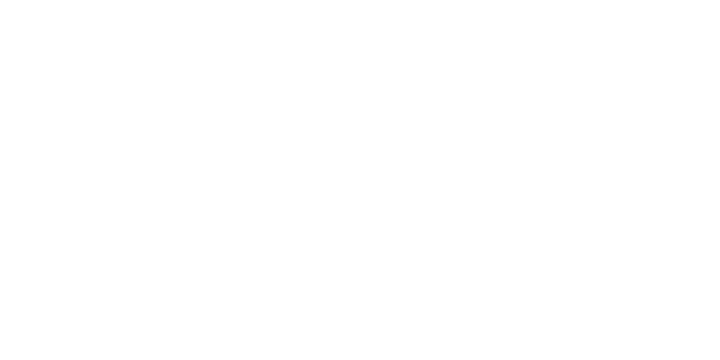

In [46]:

res = ai.integrate1d(img, 300, unit="2th_deg")

#Display the integration result
fig, ax = subplots(1,2, figsize=(10,5))
jupyter.plot1d(res, label="moke",ax=ax[0])

#Example using pure matplotlib
tth = res[0]
I = res[1]
ax[1].plot(tth, I, label="moke")
ax[1].set_title("Display 1d powder diffraction data using pure matplotlib")

In [47]:
ai.integrate1d(img, 30, unit="2th_deg", filename="moke.dat")

# now display the content of the file
with open("moke.dat") as fd:
    for line in fd:
        print(line.strip())

# == pyFAI calibration ==
# Distance Sample to Detector: 0.1 m
# PONI: 0.000e+00, 0.000e+00 m
# Rotations: 0.000000 0.000000 0.000000 rad
#
# == Fit2d calibration ==
# Distance Sample-beamCenter: 100.000 mm
# Center: x=0.000, y=0.000 pix
# Tilt: 0.000 deg  TiltPlanRot: 0.000 deg
#
# Detector Detector	 Spline= None	 PixelSize= 1.000e-04, 1.000e-04 m
#    Detector has a mask: False
#    Detector has a dark current: False
#    detector has a flat field: False
#
# Mask applied: False
# Dark current applied: False
# Flat field applied: False
# Polarization factor: None
# Normalization factor: 1.0
# --> moke.dat
#       2th_deg             I
6.331790e-01    8.040550e+00
1.899537e+00    4.227679e+01
3.165895e+00    4.360847e+01
4.432253e+00    3.776727e+01
5.698611e+00    2.623081e+01
6.964969e+00    2.346836e+01
8.231327e+00    1.570432e+01
9.497685e+00    9.263981e+00
1.076404e+01    9.935521e+00
1.203040e+01    1.006979e+01
1.329676e+01    7.570359e+00
1.456312e+01    7.886490e+00
1.582947

<IPython.core.display.Javascript object>


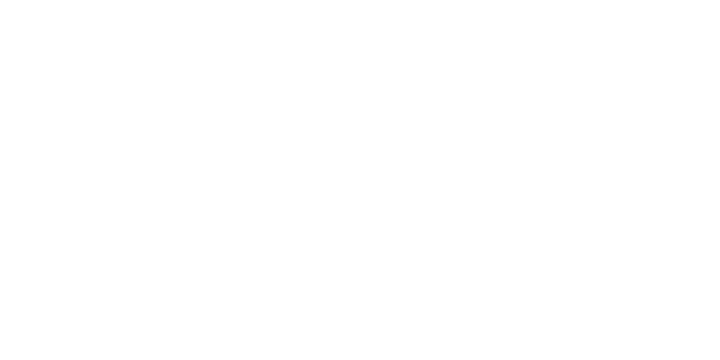

Text(0,0.5,'Azimuthal angle chi (deg)')

<IPython.core.display.Javascript object>


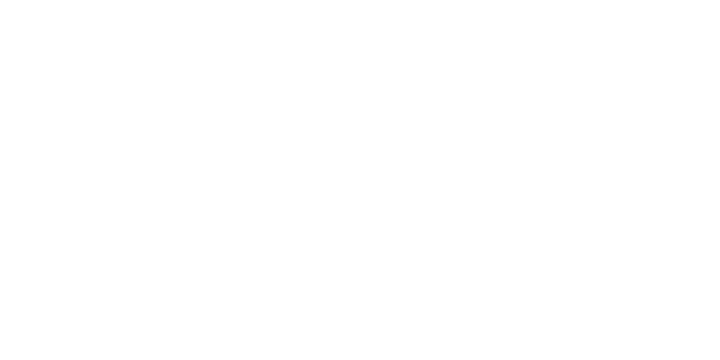

In [48]:
res2d = ai.integrate2d(img, 300, 360, unit="2th_deg")

#Display the integration result
fig, ax = subplots(1,2, figsize=(10,5))
jupyter.plot2d(res2d, label="moke",ax=ax[0])

#Example using pure matplotlib
I, tth, chi = res2d
ax[1].imshow(I, origin="lower", extent=[tth.min(), tth.max(), chi.min(), chi.max()], aspect="auto")
ax[1].set_xlabel("2 theta (deg)")
ax[1].set_ylabel("Azimuthal angle chi (deg)")

Column number 21


<IPython.core.display.Javascript object>


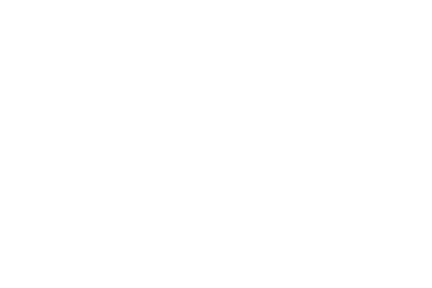

<IPython.core.display.Javascript object>


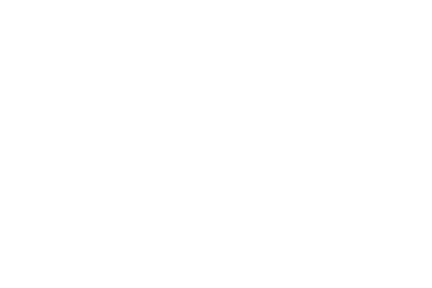

In [49]:
target = 8 #degrees
#work on fewer radial bins in order to have an actual averaging:
I, tth, chi = ai.integrate2d(img, 100, 90, unit="2th_deg")
column = argmin(abs(tth-target))
print("Column number %s"%column)

fig, ax = subplots()
ax.plot(chi, I[:,column], label=r"$2\theta=%.1f^{o}$"%target)
ax.set_xlabel("Azimuthal angle")
ax.set_ylabel("Intensity")
ax.set_title("Radial intgration")
ax.legend()

In [50]:
all_files = downloader.getdir("alumina.tar.bz2")
all_edf = [i for i in all_files if i.endswith("edf")]
all_edf.sort()
print("Number of EDF downloaded: %s"%len(all_edf))

KeyboardInterrupt: 

In [ ]:
ponifile = [i for i in all_files if i.endswith(".poni")][0]
splinefile = [i for i in all_files if i.endswith(".spline")][0]
print(ponifile, splinefile)

#patch the poni-file with the proper path.
with open(ponifile, "a") as f:
    f.write("SplineFile: %s\n"%splinefile)

ai = pyFAI.load(ponifile)
print(ai)